# Load and Append SES Data 2013 to 2023

In [265]:
import pandas as pd
import os
import numpy as np

# Replace this with the actual path to your directory
directory = '/Users/SES_data'

# List to store the DataFrames
dataframes = []

# Loop through all the files in the directory
for filename in os.listdir(directory):
    if filename.endswith('.csv'):
        filepath = os.path.join(directory, filename)
        # Extract year from the filename
        year = filename.split('_')[1].split('_')[0]
        # Extract type from the filename
        type = filename.split('_')[2].split('_')[0].split('.')[0]
        # Read the CSV file into a DataFrame
        df = pd.read_csv(filepath)
        # Add year as a new column
        df['year'] = year
        # Add type as a new column
        df['ses_type'] = type
        # Append the DataFrame to the list
        dataframes.append(df)

# Concatenate all the DataFrames in the list
combined_df = pd.concat(dataframes, ignore_index=True)

# Remove whitespace from all string columns
for col in combined_df.select_dtypes(include=['object']).columns:
    combined_df[col] = combined_df[col].str.replace(r'\s+', '', regex=True)

# Replace "N/A" with NaN
combined_df.replace("N/A", np.nan, inplace=True)

# Split into household and member DataFrames
household = combined_df[combined_df['ses_type'] == 'household']
member = combined_df[combined_df['ses_type'] == 'member']

# Define household columns to exclude and select
hh_exclude_columns = ['province', 'mem_no', 'sex', 'age', 'edu_level', 'edu_major', 'edu_cur', 'work_stat', 'ses_type']
household = household.drop(columns=hh_exclude_columns)
household = household.rename(columns={'Province': 'province'})

# Define member columns to select
mem_select_columns = ['ID', 'region', 'province', 'year', 'mem_no', 'sex', 'age', 'edu_level', 'edu_major', 'edu_cur', 'work_stat']
member = member[mem_select_columns]

# Save the cleaned and weighted DataFrames to CSV files
household.to_csv('ses_household_2013_2023.csv', index=False)
member.to_csv('ses_member_2013_2023.csv', index=False)

print("Files have been concatenated, cleaned, and weighted successfully!")

Files have been concatenated, cleaned, and weighted successfully!


# Household Data

In [266]:
import pandas as pd
import os
import numpy as np

household = pd.read_csv('ses_household_2013_2023.csv')

In [267]:
household.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 268473 entries, 0 to 268472
Data columns (total 32 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268473 non-null  float64
 1   region                268473 non-null  float64
 2   province              268473 non-null  float64
 3   house_mem_no          268473 non-null  float64
 4   avg_total_exp         268473 non-null  float64
 5   avg_con_exp           268473 non-null  float64
 6   avg_inc_a13           268473 non-null  float64
 7   avg_cur_inc           268473 non-null  float64
 8   wage_last_mon         268473 non-null  float64
 9   wage_avg              268473 non-null  float64
 10  pen_last_mon          268473 non-null  float64
 11  pen_avg               268473 non-null  float64
 12  weight                268473 non-null  float64
 13  debt_repay_avg        268473 non-null  float64
 14  house_type            268473 non-null  float64
 15  

In [268]:
household['pen_avg']

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
         ... 
268468    0.0
268469    0.0
268470    0.0
268471    0.0
268472    0.0
Name: pen_avg, Length: 268473, dtype: float64

In [269]:
# Drop rows where 'wage_avg' is NaN
household = household.dropna(subset=['avg_inc_a13'])

# Drop rows where 'wage_avg' is 0.0
household = household[household['avg_inc_a13'] != 0.0]

# Replace 0.0 with NaN
household.replace(0.0, np.nan, inplace=True)

In [270]:
# Calculate the ratio of non-null values for each column
non_null_ratios = household.notnull().mean()

# Display the ratios
print(non_null_ratios)

ID                      1.000000
region                  1.000000
province                1.000000
house_mem_no            1.000000
avg_total_exp           1.000000
avg_con_exp             1.000000
avg_inc_a13             1.000000
avg_cur_inc             0.999993
wage_last_mon           0.490559
wage_avg                0.498516
pen_last_mon            0.041972
pen_avg                 0.042315
weight                  1.000000
debt_repay_avg          0.482163
house_type              1.000000
house_occ               1.000000
month_rent              1.000000
con_exp_house_rent      0.024834
con_exp_elec            0.326307
con_exp_cook_gas        0.093401
con_exp_other_gas       0.000786
con_exp_coal            0.028477
con_exp_kero            0.000253
con_exp_light           0.022815
con_exp_water           0.151245
debt_total_end_month    0.180727
debt_house_form         0.022319
debt_house_inform       0.000484
debt_total              0.003378
debt_total_form         0.002164
debt_total

In [271]:
threshold = 0.01
columns_to_keep = non_null_ratios[non_null_ratios >= threshold].index

# Select only the columns to keep
household = household[columns_to_keep]

household.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268465 entries, 0 to 268472
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268465 non-null  float64
 1   region                268465 non-null  float64
 2   province              268465 non-null  float64
 3   house_mem_no          268465 non-null  float64
 4   avg_total_exp         268465 non-null  float64
 5   avg_con_exp           268465 non-null  float64
 6   avg_inc_a13           268465 non-null  float64
 7   avg_cur_inc           268463 non-null  float64
 8   wage_last_mon         131698 non-null  float64
 9   wage_avg              133834 non-null  float64
 10  pen_last_mon          11268 non-null   float64
 11  pen_avg               11360 non-null   float64
 12  weight                268465 non-null  float64
 13  debt_repay_avg        129444 non-null  float64
 14  house_type            268465 non-null  float64
 15  house

In [272]:
# List of columns to fill with mode values
columns_to_fill = household.columns.to_list()

# Function to compute the mean for numerical columns
def compute_mean(series):
    return series.mean()

# Group by 'province' and fill NaNs with median for numerical columns and mode for categorical columns
for column in columns_to_fill:
    if household[column].dtype in [np.float64, np.int64]:  # Check if the column is numerical
        mean_values = household.groupby('province')[column].transform(compute_mean)
        household[column].fillna(mean_values, inplace=True)

# Fill the remaining NaNs with overall median or mode
for column in columns_to_fill:
    if household[column].dtype in [np.float64, np.int64]:  # Check if the column is numerical
        overall_mean = household[column].mean()
        household[column].fillna(overall_mean, inplace=True)

In [273]:
household.info()

<class 'pandas.core.frame.DataFrame'>
Index: 268465 entries, 0 to 268472
Data columns (total 26 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   ID                    268465 non-null  float64
 1   region                268465 non-null  float64
 2   province              268465 non-null  float64
 3   house_mem_no          268465 non-null  float64
 4   avg_total_exp         268465 non-null  float64
 5   avg_con_exp           268465 non-null  float64
 6   avg_inc_a13           268465 non-null  float64
 7   avg_cur_inc           268465 non-null  float64
 8   wage_last_mon         268465 non-null  float64
 9   wage_avg              268465 non-null  float64
 10  pen_last_mon          268465 non-null  float64
 11  pen_avg               268465 non-null  float64
 12  weight                268465 non-null  float64
 13  debt_repay_avg        268465 non-null  float64
 14  house_type            268465 non-null  float64
 15  house

In [274]:
household['pen_avg']

0         29551.337612
1         29551.337612
2         29551.337612
3         29551.337612
4         29551.337612
              ...     
268468    27792.217949
268469    27792.217949
268470    27792.217949
268471    27792.217949
268472    27792.217949
Name: pen_avg, Length: 268465, dtype: float64

In [275]:
household.columns

Index(['ID', 'region', 'province', 'house_mem_no', 'avg_total_exp',
       'avg_con_exp', 'avg_inc_a13', 'avg_cur_inc', 'wage_last_mon',
       'wage_avg', 'pen_last_mon', 'pen_avg', 'weight', 'debt_repay_avg',
       'house_type', 'house_occ', 'month_rent', 'con_exp_house_rent',
       'con_exp_elec', 'con_exp_cook_gas', 'con_exp_coal', 'con_exp_light',
       'con_exp_water', 'debt_total_end_month', 'debt_house_form', 'year'],
      dtype='object')

In [276]:
household = household[['ID', 'region', 'province', 'house_mem_no', 'avg_total_exp',
       'avg_con_exp', 'avg_inc_a13', 'avg_cur_inc', 'wage_last_mon',
       'wage_avg', 'weight', 'debt_repay_avg',
       'house_type', 'house_occ', 'month_rent', 'debt_total_end_month', 'debt_house_form', 'year']]

In [277]:
# Convert columns to numeric and handle errors

# List of numerical columns to apply weights to
hh_numerical_cols = [
 'house_mem_no', 'avg_total_exp',
       'avg_con_exp', 'avg_inc_a13', 'avg_cur_inc', 'wage_last_mon',
       'wage_avg','debt_repay_avg',
       'house_type', 'house_occ', 'month_rent', 'debt_total_end_month'
]
# Convert columns to numeric and handle errors
for column in hh_numerical_cols + ['weight']:
    household[column] = pd.to_numeric(household[column], errors='coerce')

# Function to apply weights
def apply_weights(group, weight_column, columns):
    weighted_means = {}
    for column in columns:
        weighted_sum = (group[column] * group[weight_column]).sum()
        total_weight = group[weight_column].sum()
        weighted_mean = weighted_sum / total_weight if total_weight != 0 else 0
        weighted_means[column] = weighted_mean
    return weighted_means

# Group by year and apply weights
grouped = household.groupby('year')
weighted_results = grouped.apply(lambda x: apply_weights(x, 'weight', hh_numerical_cols)).reset_index().interpolate(method='polynomial', order=2).ffill().bfill()

# Convert results to DataFrame for better readability
weighted_household = pd.json_normalize(weighted_results.to_dict(orient='records'))

# Remove the '0.' prefix from column names
weighted_household.columns = weighted_household.columns.str.replace('0.', '')

print(weighted_household)

   year  house_mem_no  avg_total_exp   avg_con_exp   avg_inc_a13  \
0  2013      3.035081   19061.661691  16786.864742  25194.681884   
1  2015      2.897596   21251.846928  18529.726931  27050.080405   
2  2017      2.847508   21436.546952  18642.460101  26946.389018   
3  2019      2.715059   20737.559967  17987.672340  26100.812825   
4  2021      2.750002   21616.403699  18802.395777  27351.696000   
5  2023      2.664585   23694.520765  20644.407520  29030.399442   

    avg_cur_inc  wage_last_mon      wage_avg  debt_repay_avg  house_type  \
0  24845.718315   20145.072964  19607.224478     7210.423703    1.373542   
1  26649.129670   21562.736952  21076.574430     7881.213549    1.437650   
2  26602.933958   21488.711010  21227.069535     7881.456225    1.435400   
3  25794.739709   21447.193725  20997.274328     7850.462536    1.429969   
4  27017.503049   21414.957600  21019.299118     7573.661347    1.450926   
5  28705.812223   22086.079469  21836.246246     7604.149637    1.5

/var/folders/_3/k63_wqsd18973sw99tsjfggh0000gn/T/ipykernel_42620/871979021.py:26: FutureWarning: DataFrame.interpolate with object dtype is deprecated and will raise in a future version. Call obj.infer_objects(copy=False) before interpolating instead.
  weighted_results = grouped.apply(lambda x: apply_weights(x, 'weight', hh_numerical_cols)).reset_index().interpolate(method='polynomial', order=2).ffill().bfill()


In [278]:
weighted_household = weighted_household.drop_duplicates()

In [279]:
weighted_household[['avg_inc_a13']]

,avg_inc_a13
0,25194.681884
1,27050.080405
2,26946.389018
3,26100.812825
4,27351.696000
5,29030.399442


In [280]:
# Calculate year-over-year growth rate for 'avg_inc_a13'
weighted_household['household_income_growth_rate'] = weighted_household['avg_inc_a13'].pct_change()

weighted_household = weighted_household.drop(columns='avg_inc_a13')
weighted_household['household_income_growth_rate'] = weighted_household['household_income_growth_rate'].bfill()

In [281]:
weighted_household

,year,house_mem_no,avg_total_exp,avg_con_exp,avg_cur_inc,wage_last_mon,wage_avg,debt_repay_avg,house_type,house_occ,month_rent,debt_total_end_month,household_income_growth_rate
0,2013,3.035081,19061.661691,16786.864742,24845.718315,20145.072964,19607.224478,7210.423703,1.373542,1.989579,2370.146500,408637.707466,0.073642
1,2015,2.897596,21251.846928,18529.726931,26649.129670,21562.736952,21076.574430,7881.213549,1.437650,2.120226,2797.418733,423265.464030,0.073642
2,2017,2.847508,21436.546952,18642.460101,26602.933958,21488.711010,21227.069535,7881.456225,1.435400,2.189393,2907.288343,422183.133881,-0.003833
3,2019,2.715059,20737.559967,17987.672340,25794.739709,21447.193725,20997.274328,7850.462536,1.429969,2.103786,2949.797714,422571.067840,-0.031380
4,2021,2.750002,21616.403699,18802.395777,27017.503049,21414.957600,21019.299118,7573.661347,1.450926,2.120776,3107.154532,412147.446310,0.047925
5,2023,2.664585,23694.520765,20644.407520,28705.812223,22086.079469,21836.246246,7604.149637,1.556550,2.211568,3420.467635,422364.180814,0.061375


In [282]:
weighted_household.to_csv('ses_household_data_weighted_2013_2023.csv', index= False)

In [283]:
# Set 'year' as the index
weighted_household.set_index('year', inplace=True)
weighted_household.index = pd.to_datetime(weighted_household.index, format = '%Y')

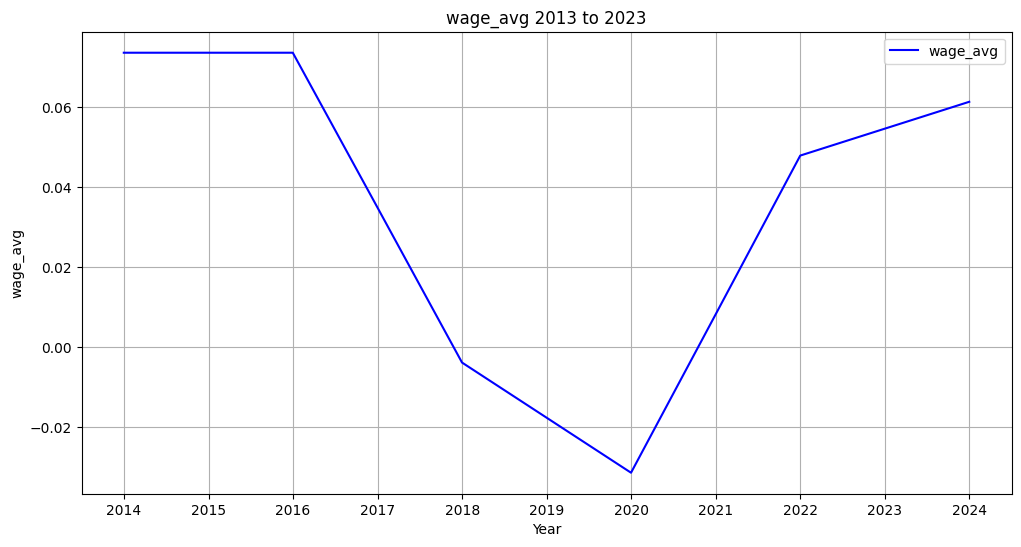

In [284]:
import matplotlib.pyplot as plt

# Compute the average 'wage_avg' by year using resampling
hh_income_avg = weighted_household['household_income_growth_rate'].resample('Y').mean().interpolate(method='linear').ffill().bfill()

# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(hh_income_avg.index, hh_income_avg, label='wage_avg', color='blue')

plt.xlabel('Year')
plt.ylabel('wage_avg')
plt.title('wage_avg 2013 to 2023')
plt.legend()
plt.grid(True)
plt.show()

In [285]:
hh_income_avg

year
2013-12-31    0.073642
2014-12-31    0.073642
2015-12-31    0.073642
2016-12-31    0.034905
2017-12-31   -0.003833
2018-12-31   -0.017607
2019-12-31   -0.031380
2020-12-31    0.008273
2021-12-31    0.047925
2022-12-31    0.054650
2023-12-31    0.061375
Freq: A-DEC, Name: household_income_growth_rate, dtype: float64

# Household Income Prediction

## Merge Dataset

In [286]:
import pandas as pd
import yfinance as yf

# Fetch historical data using yfinance
tickers_info = {
    'SET Index': ('^SET.BK', 'Stock Index')
}

def fetch_historical_data(ticker_dict):
    historical_data_list = []
    for name, (ticker, ticker_type) in ticker_dict.items():
        # print(f"Fetching data for {name} ({ticker})...")
        data = yf.Ticker(ticker).history(period= 'max')
        data.index = pd.to_datetime(data.index, utc=False)
        data['Ticker_Name'] = name
        data['Ticker_Type'] = ticker_type
        data['Date'] = data.index
        data['year'] = data['Date'].dt.year
        historical_data_list.append(data[['year', 'Close', 'Ticker_Name', 'Ticker_Type']])
        # print(data.head(), "\n")
    return historical_data_list

historical_data_list = fetch_historical_data(tickers_info)

In [287]:
historical_data = pd.concat(historical_data_list)
historical_data.reset_index(drop=False, inplace=True)
historical_data = historical_data.groupby(['year', 'Ticker_Name']).head(1) 
historical_data = historical_data[(historical_data['year'] >= 2012) & (historical_data['year'] <= 2024)]
historical_data.columns = ['Date', 'year', 'value', 'data_type', 'attribute_type']
historical_data = historical_data.drop('Date', axis= 1)

historical_data.to_csv('historical_data.csv', index = False)

In [288]:
historical_data

,year,value,data_type,attribute_type
3687,2012,1036.209961,SET Index,Stock Index
3932,2013,1407.449951,SET Index,Stock Index
4177,2014,1230.770020,SET Index,Stock Index
4422,2015,1483.250000,SET Index,Stock Index
4665,2016,1263.410034,SET Index,Stock Index
4909,2017,1563.579956,SET Index,Stock Index
5151,2018,1778.530029,SET Index,Stock Index
5396,2019,1565.939941,SET Index,Stock Index
5639,2020,1595.819946,SET Index,Stock Index
5881,2021,1468.239990,SET Index,Stock Index


In [289]:
import pandas as pd
import os

# Define the directory path
directory = '/Users/Thailand GDP Prediction 2024'

# Read the CSV files
countries_of_interest = ['Thailand', 'United States']

gdp_growth = pd.read_csv(f'{directory}/gdp_growth.csv')
gdp_growth = gdp_growth[gdp_growth['country'].isin(countries_of_interest)]

unemployment_rate = pd.read_csv(f'{directory}/unemployment_rate.csv')
unemployment_rate = unemployment_rate[unemployment_rate['country'].isin(countries_of_interest)]

inflation_rate = pd.read_csv(f'{directory}/inflation_rate.csv')
inflation_rate = inflation_rate[inflation_rate['country'].isin(countries_of_interest)]

th_pop = pd.read_csv(f'{directory}/th_pop.csv')

# Convert 'year' in th_pop to datetime
th_pop['year'] = pd.to_datetime(th_pop['year'], format='%Y')
th_pop['year'] = th_pop['year'].dt.year

# Filter relevant population data
relevant_data_types = [
    'Human capital index (HCI) (scale 0-1)', 'Gini index'
]
th_pop = th_pop[th_pop['data_type'].isin(relevant_data_types)]

# Replace specific data_type values
th_pop['data_type'] = th_pop['data_type'].replace({
    'Human capital index (HCI) (scale 0-1)': 'HCI',
    'Gini index': 'Gini_index'
})

# Function to reshape data
def reshape_data(df, data_type, attribute_type=None):
    df_long = df.melt(id_vars=['country'], var_name='year', value_name='value')
    df_long['value'].replace('no data', pd.NA, inplace=True)
    df_long['data_type'] = data_type
    if attribute_type:
        df_long['attribute_type'] = attribute_type
    return df_long

# Reshape each dataset
gdp_price_long = reshape_data(gdp_growth, data_type='gdp_growth', attribute_type='Annual percent change')
unemployment_rate_long = reshape_data(unemployment_rate, data_type='unemployment_rate', attribute_type='Percent')
inflation_rate_long = reshape_data(inflation_rate, data_type='inflation_rate', attribute_type='Annual percent change')

# Combine all reshaped datasets
all_data_long = pd.concat([gdp_price_long, unemployment_rate_long, inflation_rate_long])

# Filter out rows where 'year' contains 'data_type' or 'trade_type'
not_relevant_data_types = ['data_type', 'trade_type']
all_data_long = all_data_long[~all_data_long['year'].str.contains('|'.join(not_relevant_data_types), case=False, na=False)]

# Drop rows with NaN values in the 'value' column
all_data_long = all_data_long.dropna(subset=['value'])

all_data_long = pd.concat([all_data_long, th_pop, historical_data])
all_data_long['country'] = all_data_long['country'].fillna('Thailand')

all_data_long['year'] = pd.to_datetime(all_data_long['year'], format= '%Y')
all_data_long['year'] = all_data_long['year'].dt.year
all_data_long = all_data_long[(all_data_long['year'] >= 2012) & (all_data_long['year'] <= 2024)]

years_to_exclude = [2012, 2014, 2016, 2018, 2020, 2022, 2024]
all_data_long = all_data_long[~all_data_long['year'].isin(years_to_exclude)]
all_data_long['value'] = all_data_long['value'].astype(float)

In [290]:
all_data_long

,country,year,value,data_type,attribute_type
66,Thailand,2013,2.700000,gdp_growth,Annual percent change
67,United States,2013,2.100000,gdp_growth,Annual percent change
70,Thailand,2015,3.100000,gdp_growth,Annual percent change
71,United States,2015,2.900000,gdp_growth,Annual percent change
74,Thailand,2017,4.200000,gdp_growth,Annual percent change
75,United States,2017,2.500000,gdp_growth,Annual percent change
78,Thailand,2019,2.100000,gdp_growth,Annual percent change
79,United States,2019,2.500000,gdp_growth,Annual percent change
82,Thailand,2021,1.500000,gdp_growth,Annual percent change
83,United States,2021,5.800000,gdp_growth,Annual percent change


In [291]:
# Filter the DataFrame for Thailand and GDP growth
thailand_gdp_growth = all_data_long[(all_data_long['country'] == 'Thailand') & (all_data_long['data_type'] == 'unemployment_rate')]

# Calculate the percentage change
thailand_gdp_growth['pct_change'] = thailand_gdp_growth['value'].pct_change()*100

# Display the result
thailand_gdp_growth

/var/folders/_3/k63_wqsd18973sw99tsjfggh0000gn/T/ipykernel_42620/2426905871.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  thailand_gdp_growth['pct_change'] = thailand_gdp_growth['value'].pct_change()*100


,country,year,value,data_type,attribute_type,pct_change
66,Thailand,2013,0.7,unemployment_rate,Percent,NaN
70,Thailand,2015,0.9,unemployment_rate,Percent,28.571429
74,Thailand,2017,1.2,unemployment_rate,Percent,33.333333
78,Thailand,2019,1.0,unemployment_rate,Percent,-16.666667
82,Thailand,2021,1.9,unemployment_rate,Percent,90.000000
86,Thailand,2023,1.2,unemployment_rate,Percent,-36.842105


In [292]:
# Filter the DataFrame for Thailand and GDP growth
us_gdp_growth = all_data_long[(all_data_long['country'] == 'United States') & (all_data_long['data_type'] == 'gdp_growth')]

# Calculate the percentage change
us_gdp_growth['pct_change'] = us_gdp_growth['value'].pct_change()*100

# Display the result
us_gdp_growth

/var/folders/_3/k63_wqsd18973sw99tsjfggh0000gn/T/ipykernel_42620/842230739.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  us_gdp_growth['pct_change'] = us_gdp_growth['value'].pct_change()*100


,country,year,value,data_type,attribute_type,pct_change
67,United States,2013,2.1,gdp_growth,Annual percent change,NaN
71,United States,2015,2.9,gdp_growth,Annual percent change,38.095238
75,United States,2017,2.5,gdp_growth,Annual percent change,-13.793103
79,United States,2019,2.5,gdp_growth,Annual percent change,0.000000
83,United States,2021,5.8,gdp_growth,Annual percent change,132.000000
87,United States,2023,2.5,gdp_growth,Annual percent change,-56.896552


In [293]:
th_pop

,data_type,attribute_type,country,year,value
635,HCI,TH_pop,Thailand,2020,0.609
636,HCI,TH_pop,Thailand,2018,0.617
637,HCI,TH_pop,Thailand,2017,0.604
638,HCI,TH_pop,Thailand,2010,0.585
639,Gini_index,TH_pop,Thailand,2021,35.100
640,Gini_index,TH_pop,Thailand,2020,35.000
641,Gini_index,TH_pop,Thailand,2019,34.900
642,Gini_index,TH_pop,Thailand,2018,36.400
643,Gini_index,TH_pop,Thailand,2017,36.500
644,Gini_index,TH_pop,Thailand,2016,36.900


In [294]:
all_data_long

,country,year,value,data_type,attribute_type
66,Thailand,2013,2.700000,gdp_growth,Annual percent change
67,United States,2013,2.100000,gdp_growth,Annual percent change
70,Thailand,2015,3.100000,gdp_growth,Annual percent change
71,United States,2015,2.900000,gdp_growth,Annual percent change
74,Thailand,2017,4.200000,gdp_growth,Annual percent change
75,United States,2017,2.500000,gdp_growth,Annual percent change
78,Thailand,2019,2.100000,gdp_growth,Annual percent change
79,United States,2019,2.500000,gdp_growth,Annual percent change
82,Thailand,2021,1.500000,gdp_growth,Annual percent change
83,United States,2021,5.800000,gdp_growth,Annual percent change


In [295]:
all_data_long.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48 entries, 66 to 6362
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   country         48 non-null     object 
 1   year            48 non-null     int32  
 2   value           48 non-null     float64
 3   data_type       48 non-null     object 
 4   attribute_type  48 non-null     object 
dtypes: float64(1), int32(1), object(3)
memory usage: 2.1+ KB


In [296]:
# Concatenate 'country' and 'data_type' columns
all_data_long['data_type'] = all_data_long['country'] + '_' + all_data_long['data_type']

all_data_long = all_data_long.pivot_table(index=['year'], columns='data_type', values='value').reset_index()
all_data_long = all_data_long[['year',
 'Thailand_Gini_index',
 'Thailand_HCI',
 'Thailand_SET Index',
 'Thailand_gdp_growth',
 'Thailand_unemployment_rate',
 'United States_gdp_growth',
 'United States_unemployment_rate']]


In [297]:
all_data_long

data_type,year,Thailand_Gini_index,Thailand_HCI,Thailand_SET Index,Thailand_gdp_growth,Thailand_unemployment_rate,United States_gdp_growth,United States_unemployment_rate
0,2013,37.8,NaN,1407.449951,2.7,0.7,2.1,7.4
1,2015,36.0,NaN,1483.250000,3.1,0.9,2.9,5.3
2,2017,36.5,0.604,1563.579956,4.2,1.2,2.5,4.4
3,2019,34.9,NaN,1565.939941,2.1,1.0,2.5,3.7
4,2021,35.1,NaN,1468.239990,1.5,1.9,5.8,5.4
5,2023,NaN,NaN,1678.969971,1.9,1.2,2.5,3.6


In [298]:
hci_df = th_pop[th_pop['data_type'] == 'HCI']
gini_df = th_pop[th_pop['data_type'] == 'Gini_index']

In [299]:
gini_df

,data_type,attribute_type,country,year,value
639,Gini_index,TH_pop,Thailand,2021,35.1
640,Gini_index,TH_pop,Thailand,2020,35.0
641,Gini_index,TH_pop,Thailand,2019,34.9
642,Gini_index,TH_pop,Thailand,2018,36.4
643,Gini_index,TH_pop,Thailand,2017,36.5
644,Gini_index,TH_pop,Thailand,2016,36.9
645,Gini_index,TH_pop,Thailand,2015,36.0
646,Gini_index,TH_pop,Thailand,2014,37.0
647,Gini_index,TH_pop,Thailand,2013,37.8
648,Gini_index,TH_pop,Thailand,2012,39.3


In [300]:
# Fill missing HCI values
hci_df = th_pop[th_pop['data_type'] == 'HCI']

all_data_long.loc[all_data_long['year'] == 2013, 'Thailand_HCI'] = hci_df.loc[hci_df['year'] == 2010, 'value'].values[0]
all_data_long.loc[all_data_long['year'] == 2015, 'Thailand_HCI'] = hci_df.loc[hci_df['year'] == 2010, 'value'].values[0]
all_data_long.loc[all_data_long['year'] == 2019, 'Thailand_HCI'] = hci_df.loc[hci_df['year'] == 2018, 'value'].values[0]
all_data_long.loc[all_data_long['year'] == 2021, 'Thailand_HCI'] = hci_df.loc[hci_df['year'] == 2020, 'value'].values[0]
all_data_long.loc[all_data_long['year'] == 2023, 'Thailand_HCI'] = hci_df.loc[hci_df['year'] == 2020, 'value'].values[0]
gini_df = th_pop[th_pop['data_type'] == 'Gini_index']

all_data_long.loc[all_data_long['year'] == 2023, 'Thailand_Gini_index'] = gini_df.loc[gini_df['year'] == 2021, 'value'].values[0]

In [301]:
all_data_long

data_type,year,Thailand_Gini_index,Thailand_HCI,Thailand_SET Index,Thailand_gdp_growth,Thailand_unemployment_rate,United States_gdp_growth,United States_unemployment_rate
0,2013,37.8,0.585,1407.449951,2.7,0.7,2.1,7.4
1,2015,36.0,0.585,1483.250000,3.1,0.9,2.9,5.3
2,2017,36.5,0.604,1563.579956,4.2,1.2,2.5,4.4
3,2019,34.9,0.617,1565.939941,2.1,1.0,2.5,3.7
4,2021,35.1,0.609,1468.239990,1.5,1.9,5.8,5.4
5,2023,35.1,0.609,1678.969971,1.9,1.2,2.5,3.6


In [302]:
all_data_long.columns.to_list()

['year',
 'Thailand_Gini_index',
 'Thailand_HCI',
 'Thailand_SET Index',
 'Thailand_gdp_growth',
 'Thailand_unemployment_rate',
 'United States_gdp_growth',
 'United States_unemployment_rate']

In [303]:
all_data_long.to_csv('econ_data.csv', index= False)

In [304]:
all_data_long

data_type,year,Thailand_Gini_index,Thailand_HCI,Thailand_SET Index,Thailand_gdp_growth,Thailand_unemployment_rate,United States_gdp_growth,United States_unemployment_rate
0,2013,37.8,0.585,1407.449951,2.7,0.7,2.1,7.4
1,2015,36.0,0.585,1483.250000,3.1,0.9,2.9,5.3
2,2017,36.5,0.604,1563.579956,4.2,1.2,2.5,4.4
3,2019,34.9,0.617,1565.939941,2.1,1.0,2.5,3.7
4,2021,35.1,0.609,1468.239990,1.5,1.9,5.8,5.4
5,2023,35.1,0.609,1678.969971,1.9,1.2,2.5,3.6


## SES Data

In [305]:
import pandas as pd

directory = '/Users/growth'
weighted_df = pd.read_csv(f'{directory}/ses_household_data_weighted_2013_2023.csv')
weighted_df['year'] = pd.to_datetime(weighted_df['year'], format = '%Y')

In [306]:
econ_df = pd.read_csv(f'{directory}/econ_data.csv')

In [307]:
econ_df['year'] = pd.to_datetime(econ_df['year'], format = '%Y')

In [308]:
# Merge the dataframes on the 'year' column
hh_forecast_econ = pd.merge(weighted_df, econ_df, on='year', how='left')
hh_forecast_econ['year'] = pd.to_datetime(hh_forecast_econ['year'], format= '%Y')
hh_forecast_econ = hh_forecast_econ.drop_duplicates()
hh_forecast_econ = hh_forecast_econ.dropna()
hh_forecast_econ.set_index('year', inplace= True)

In [309]:
hh_forecast_econ.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6 entries, 2013-01-01 to 2023-01-01
Data columns (total 19 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   house_mem_no                     6 non-null      float64
 1   avg_total_exp                    6 non-null      float64
 2   avg_con_exp                      6 non-null      float64
 3   avg_cur_inc                      6 non-null      float64
 4   wage_last_mon                    6 non-null      float64
 5   wage_avg                         6 non-null      float64
 6   debt_repay_avg                   6 non-null      float64
 7   house_type                       6 non-null      float64
 8   house_occ                        6 non-null      float64
 9   month_rent                       6 non-null      float64
 10  debt_total_end_month             6 non-null      float64
 11  household_income_growth_rate     6 non-null      float64
 12  Thail

In [310]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Standardization
scaler_standard = StandardScaler()
standardized_features = scaler_standard.fit_transform(hh_forecast_econ)

# Convert the results back to DataFrames
standardized_hh_forecast_econ_df = pd.DataFrame(standardized_features, columns=hh_forecast_econ.columns)
standardized_hh_forecast_econ_df.index = hh_forecast_econ.index  # Ensure index is maintained

def fit_and_forecast_arima(data, target, forecast_periods=5, order=(2, 1, 1)):
    """
    Fit an ARIMA model to the target variable and forecast future values.
    
    Parameters:
    - data: DataFrame containing the time series data.
    - target: The target variable to forecast.
    - forecast_periods: Number of periods to forecast (default is 5).
    - order: The (p, d, q) order of the ARIMA model (default is (2, 1, 1)).
    
    Returns:
    - A DataFrame containing the forecasted values of the target variable.
    """
    target_var = data[target].dropna().astype(float)
    
    if len(target_var) > 1:
        try:
            # Fit ARIMA model
            arima_model = ARIMA(target_var, order=order)
            arima_fit = arima_model.fit()

            # Forecast
            arima_forecast = arima_fit.forecast(steps=forecast_periods)
            forecast_df = arima_forecast.to_frame(name=target)
            forecast_df.index = pd.date_range(start=target_var.index[-1], periods=forecast_periods+1, freq='2YS')[1:]
            return forecast_df
        except Exception as e:
            print(f"Error fitting ARIMA model for {target}: {e}")
            return pd.DataFrame()
    else:
        print(f"Not enough data to fit ARIMA model for {target}.")
        return pd.DataFrame()

# List of target variables to forecast, excluding any datetime columns
targets = [col for col in standardized_hh_forecast_econ_df.columns if pd.api.types.is_numeric_dtype(standardized_hh_forecast_econ_df[col])]

forecast_periods = 5  # Define the forecast period
order = (2, 1, 1)  # Adjust the order (p, d, q) as needed

# Dictionary to store forecasted data
forecasts = {}

# Fit and forecast ARIMA model for each target
for target in targets:
    forecasted_data = fit_and_forecast_arima(standardized_hh_forecast_econ_df, target, forecast_periods, order)
    forecasts[target] = forecasted_data

# Combine all forecasted dataframes by the index (year)
combined_forecasts = pd.DataFrame()
for target, forecast in forecasts.items():
    if combined_forecasts.empty:
        combined_forecasts = forecast
    else:
        combined_forecasts = combined_forecasts.join(forecast, how='outer')

# Ensure the index is named 'year' and merge with original data
combined_forecasts.index.name = 'year'

# Reset index for merging
combined_forecasts.reset_index(inplace=True)

# Merge the combined forecasts with the original standardized_df DataFrame
standardized_hh_forecast_econ_df.reset_index(inplace=True)

# Concatenate the original and forecasted DataFrames
standardized_hh_forecast_econ_forecast = pd.concat([standardized_hh_forecast_econ_df, combined_forecasts], axis=0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library

In [311]:
standardized_hh_forecast_econ_forecast

,year,house_mem_no,avg_total_exp,avg_con_exp,avg_cur_inc,wage_last_mon,wage_avg,debt_repay_avg,house_type,house_occ,month_rent,debt_total_end_month,household_income_growth_rate,Thailand_Gini_index,Thailand_HCI,Thailand_SET Index,Thailand_gdp_growth,Thailand_unemployment_rate,United States_gdp_growth,United States_unemployment_rate
0,2013-01-01,1.740373,-1.639487,-1.551848,-1.490462,-2.063359,-2.022153,-1.899047,-1.350202,-1.867101,-1.750359,-1.690427,0.911963,1.860125,-1.344607,-1.381663,0.130870,-1.192079,-0.759191,1.883597
1,2015-01-01,0.636587,-0.035096,-0.031287,0.039439,0.349363,0.173260,0.891628,-0.177275,-0.032693,-0.403392,0.809675,0.911963,0.097901,-1.344607,-0.512209,0.579566,-0.662266,-0.119872,0.258027
2,2017-01-01,0.234453,0.100204,0.067067,0.000250,0.223378,0.398121,0.892637,-0.218451,0.938474,-0.057030,0.624689,-1.010769,0.587408,0.203728,0.409205,1.813480,0.132453,-0.439531,-0.438646
3,2019-01-01,-0.828905,-0.411830,-0.504203,-0.685372,0.152720,0.054775,0.763695,-0.317815,-0.263529,0.076980,0.690992,-1.694400,-0.979013,1.263116,0.436275,-0.542174,-0.397360,-0.439531,-0.980502
4,2021-01-01,-0.548370,0.231956,0.206603,0.351944,0.097857,0.087683,-0.387876,0.065619,-0.024974,0.573044,-1.090561,0.273729,-0.783210,0.611185,-0.684379,-1.215219,1.986799,2.197657,0.335435
5,2023-01-01,-1.234139,1.754253,1.813667,1.784200,1.240040,1.308315,-0.261036,1.998123,1.249824,1.560757,0.655632,0.607513,-0.783210,0.611185,1.732770,-0.766523,0.132453,-0.439531,-1.057910
0,2025-01-01,-0.809863,2.448532,2.325961,1.291185,0.907605,1.308316,-0.261036,3.462184,0.378880,2.799049,0.655634,-1.154163,-0.877046,1.410146,0.584315,-0.020438,2.516599,0.991062,-0.879323
1,2027-01-01,-1.324957,1.829861,1.424372,0.133799,0.862613,1.308316,-0.261036,3.883346,-0.167971,3.878198,0.655633,-1.639282,-0.873192,1.385623,0.368357,0.212405,1.172809,0.874218,-1.155566
2,2029-01-01,-0.906062,1.030329,0.662127,0.468273,0.908397,1.308316,-0.261036,3.744084,1.152458,4.671525,0.655633,-0.007962,-0.932022,0.997658,0.946817,0.115371,3.107816,0.145160,-1.299338
3,2031-01-01,-1.332715,0.995572,0.956199,1.400461,0.902631,1.308316,-0.261036,3.530539,0.601961,5.188937,0.655633,0.608870,-0.927196,1.021497,0.668804,0.003549,2.158968,1.092586,-1.480826


In [312]:
standardized_hh_forecast_econ_forecast.to_csv('ses_weighed_econ_2013_2023.csv', index= False)
hh_forecast_econ.to_csv('ses_weighed_econ_2013_2023_normal.csv', index= True)

In [313]:
# Set 'year' as the index and convert to datetime if not already
# hh_forecast_econ.set_index('year', inplace=True)
hh_forecast_econ.index = pd.to_datetime(hh_forecast_econ.index, format='%Y')

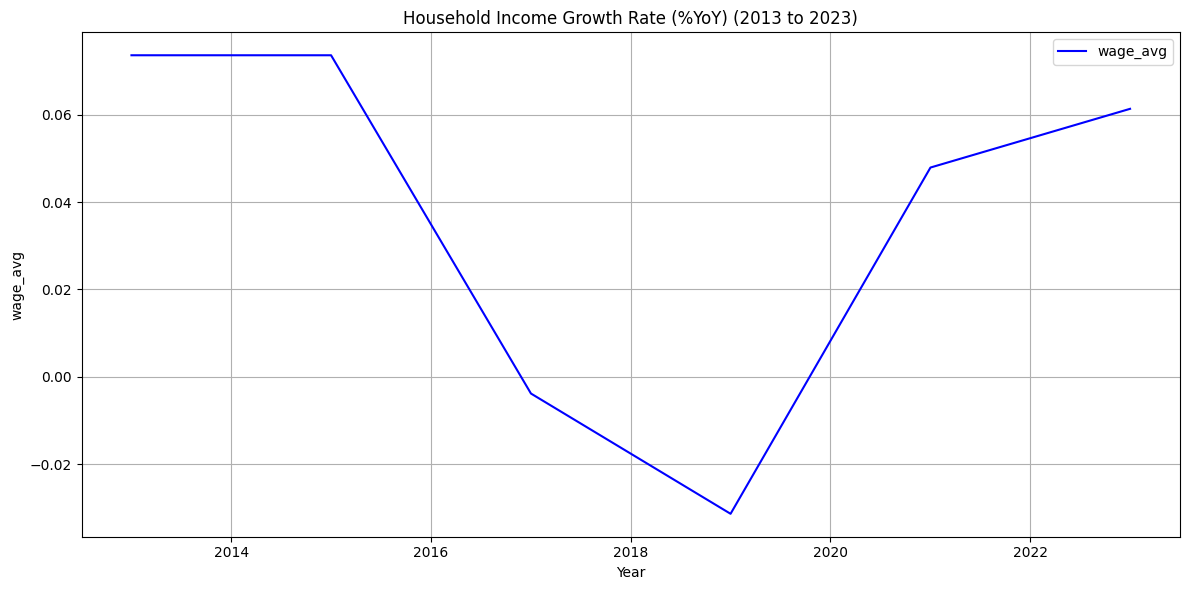

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
import numpy as np


# Compute the average 'wage_avg' by year using resampling
hh_income_avg = hh_forecast_econ['household_income_growth_rate']
# Plotting the data
plt.figure(figsize=(12, 6))
plt.plot(hh_income_avg.index, hh_income_avg, label='wage_avg', color='blue')
plt.xlabel('Year')
plt.ylabel('wage_avg')
plt.title('Household Income Growth Rate (%YoY) (2013 to 2023)')
plt.legend()
plt.grid(True)
plt.tight_layout()  # Ensures labels fit nicely in the plot
plt.show()


In [315]:
hh_income_avg

year
2013-01-01    0.073642
2015-01-01    0.073642
2017-01-01   -0.003833
2019-01-01   -0.031380
2021-01-01    0.047925
2023-01-01    0.061375
Name: household_income_growth_rate, dtype: float64

## EDA

In [316]:
import pandas as pd

directory = '/Users/growth'
weighted_df = pd.read_csv(f'{directory}/ses_weighed_econ_2013_2023.csv')

In [317]:
weighted_df

,year,house_mem_no,avg_total_exp,avg_con_exp,avg_cur_inc,wage_last_mon,wage_avg,debt_repay_avg,house_type,house_occ,month_rent,debt_total_end_month,household_income_growth_rate,Thailand_Gini_index,Thailand_HCI,Thailand_SET Index,Thailand_gdp_growth,Thailand_unemployment_rate,United States_gdp_growth,United States_unemployment_rate
0,2013-01-01,1.740373,-1.639487,-1.551848,-1.490462,-2.063359,-2.022153,-1.899047,-1.350202,-1.867101,-1.750359,-1.690427,0.911963,1.860125,-1.344607,-1.381663,0.130870,-1.192079,-0.759191,1.883597
1,2015-01-01,0.636587,-0.035096,-0.031287,0.039439,0.349363,0.173260,0.891628,-0.177275,-0.032693,-0.403392,0.809675,0.911963,0.097901,-1.344607,-0.512209,0.579566,-0.662266,-0.119872,0.258027
2,2017-01-01,0.234453,0.100204,0.067067,0.000250,0.223378,0.398121,0.892637,-0.218451,0.938474,-0.057030,0.624689,-1.010769,0.587408,0.203728,0.409205,1.813480,0.132453,-0.439531,-0.438646
3,2019-01-01,-0.828905,-0.411830,-0.504203,-0.685372,0.152720,0.054775,0.763695,-0.317815,-0.263529,0.076980,0.690992,-1.694400,-0.979013,1.263116,0.436275,-0.542174,-0.397360,-0.439531,-0.980502
4,2021-01-01,-0.548370,0.231956,0.206603,0.351944,0.097857,0.087683,-0.387876,0.065619,-0.024974,0.573044,-1.090561,0.273729,-0.783210,0.611185,-0.684379,-1.215219,1.986799,2.197657,0.335435
5,2023-01-01,-1.234139,1.754253,1.813667,1.784200,1.240040,1.308315,-0.261036,1.998123,1.249824,1.560757,0.655632,0.607513,-0.783210,0.611185,1.732770,-0.766523,0.132453,-0.439531,-1.057910
6,2025-01-01,-0.809863,2.448532,2.325961,1.291185,0.907605,1.308316,-0.261036,3.462184,0.378880,2.799049,0.655634,-1.154163,-0.877046,1.410146,0.584315,-0.020438,2.516599,0.991062,-0.879323
7,2027-01-01,-1.324957,1.829861,1.424372,0.133799,0.862613,1.308316,-0.261036,3.883346,-0.167971,3.878198,0.655633,-1.639282,-0.873192,1.385623,0.368357,0.212405,1.172809,0.874218,-1.155566
8,2029-01-01,-0.906062,1.030329,0.662127,0.468273,0.908397,1.308316,-0.261036,3.744084,1.152458,4.671525,0.655633,-0.007962,-0.932022,0.997658,0.946817,0.115371,3.107816,0.145160,-1.299338
9,2031-01-01,-1.332715,0.995572,0.956199,1.400461,0.902631,1.308316,-0.261036,3.530539,0.601961,5.188937,0.655633,0.608870,-0.927196,1.021497,0.668804,0.003549,2.158968,1.092586,-1.480826


In [318]:
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
import numpy as np

# Identifying the GDP column
target_column = 'household_income_growth_rate'  # the column name for Target Data
economic_indicators = weighted_df.columns.to_list()
# Filter data for GDP and selected economic indicators
eda_data = weighted_df[[target_column]]

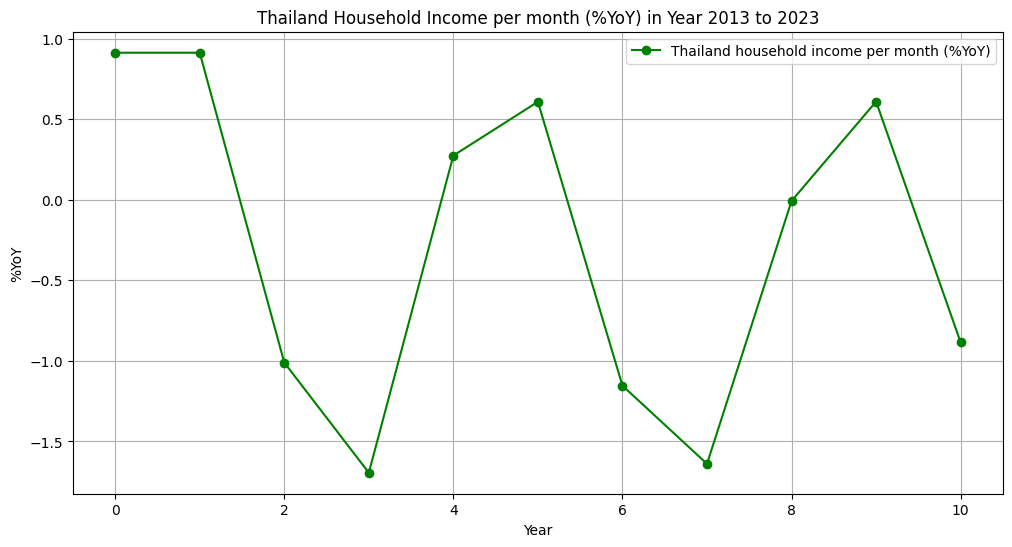

In [319]:
# Plot historical GDP data
plt.figure(figsize=(12, 6))
plt.plot(eda_data.index, eda_data[target_column], marker='o', linestyle='-', label='Thailand household income per month (%YoY)', color = 'green')
plt.title('Thailand Household Income per month (%YoY) in Year 2013 to 2023')
plt.xlabel('Year')
plt.ylabel('%YoY')
plt.legend()
plt.grid()
plt.show()

# Modelling

In [320]:
import xgboost as xgb
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error

# Load the data
directory = '/Users/growth'
model_df = pd.read_csv(f'{directory}/ses_weighed_econ_2013_2023.csv')

## Feature Engineering : lag-time

In [321]:
model_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 20 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   year                             11 non-null     object 
 1   house_mem_no                     11 non-null     float64
 2   avg_total_exp                    11 non-null     float64
 3   avg_con_exp                      11 non-null     float64
 4   avg_cur_inc                      11 non-null     float64
 5   wage_last_mon                    11 non-null     float64
 6   wage_avg                         11 non-null     float64
 7   debt_repay_avg                   11 non-null     float64
 8   house_type                       11 non-null     float64
 9   house_occ                        11 non-null     float64
 10  month_rent                       11 non-null     float64
 11  debt_total_end_month             11 non-null     float64
 12  household_income_growth_

In [322]:
lag_features = model_df.drop(columns= 'year').columns.to_list()
rolling_features = model_df.drop(columns= 'year').columns.to_list()

In [323]:
# Creating lag features for 1, 2, and 3 years
for feature in lag_features:
    for lag in range(1, 2):  # Creating lag features for 1, 2, and 3 years
        model_df[f'{feature}_lag_{lag}'] = model_df[feature].shift(lag)

# Creating rolling mean and standard deviation features with a 3-year window
for feature in rolling_features:
    model_df[f'{feature}_rolling_mean_3'] = model_df[feature].transform(lambda x: x.rolling(window=3).mean())
    model_df[f'{feature}_rolling_std_3'] = model_df[feature].transform(lambda x: x.rolling(window=3).std())

# Dropping rows with NaN values resulting from lag features
model_df = model_df.ffill().bfill()

print("Feature engineering steps completed successfully!")

Feature engineering steps completed successfully!


In [324]:
model_df[['household_income_growth_rate']]

,household_income_growth_rate
0,0.911963
1,0.911963
2,-1.010769
3,-1.694400
4,0.273729
5,0.607513
6,-1.154163
7,-1.639282
8,-0.007962
9,0.608870


In [325]:
model_df['year']

0     2013-01-01
1     2015-01-01
2     2017-01-01
3     2019-01-01
4     2021-01-01
5     2023-01-01
6     2025-01-01
7     2027-01-01
8     2029-01-01
9     2031-01-01
10    2033-01-01
Name: year, dtype: object

## Baseline : Linear Regression

Root Mean Squared Error (RMSE): 1.0007181105182428
R^2 Score: -0.3274722712248719


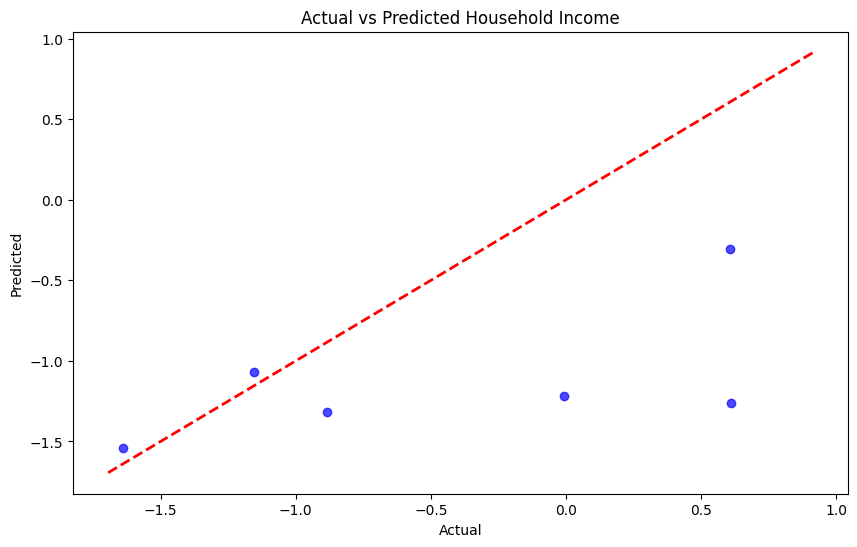

In [326]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Assuming your data is in a DataFrame called 'data'
# and your target variable is 'household_income'

model_df1 = model_df.copy()
model_df1['year'] = pd.to_datetime(model_df1['year'], format='%Y-%m-%d')
# Filter the data based on the year column for training and testing sets
train_data = model_df1[model_df1['year'].dt.year <= 2021]
test_data = model_df1[model_df1['year'].dt.year > 2021]

# Split the data into features (X) and target (y)
X_train = train_data.drop(columns=['household_income_growth_rate', 'year'])
y_train = train_data['household_income_growth_rate']
X_test = test_data.drop(columns=['household_income_growth_rate', 'year'])
y_test = test_data['household_income_growth_rate']
y = model_df1['household_income_growth_rate']
# Initialize the Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f'Root Mean Squared Error (RMSE): {rmse}')
print(f'R^2 Score: {r2}')

# Plotting the results
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue')
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--r', linewidth=2)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual vs Predicted Household Income')
plt.show()


In [327]:
# Concatenate y_train and y_pred
y_actual = pd.concat([y_train, y_test], axis=0)
y_pred_full = pd.concat([pd.Series(y_train, index=y_train.index), pd.Series(y_pred, index=y_test.index)], axis=0)

In [328]:
y_actual

0     0.911963
1     0.911963
2    -1.010769
3    -1.694400
4     0.273729
5     0.607513
6    -1.154163
7    -1.639282
8    -0.007962
9     0.608870
10   -0.885820
Name: household_income_growth_rate, dtype: float64

In [329]:
model_df

,year,house_mem_no,avg_total_exp,avg_con_exp,avg_cur_inc,wage_last_mon,wage_avg,debt_repay_avg,house_type,house_occ,...,Thailand_SET Index_rolling_mean_3,Thailand_SET Index_rolling_std_3,Thailand_gdp_growth_rolling_mean_3,Thailand_gdp_growth_rolling_std_3,Thailand_unemployment_rate_rolling_mean_3,Thailand_unemployment_rate_rolling_std_3,United States_gdp_growth_rolling_mean_3,United States_gdp_growth_rolling_std_3,United States_unemployment_rate_rolling_mean_3,United States_unemployment_rate_rolling_std_3
0,2013-01-01,1.740373,-1.639487,-1.551848,-1.490462,-2.063359,-2.022153,-1.899047,-1.350202,-1.867101,...,-0.494889,0.895559,0.841305,0.871307,-0.573964,0.666667,-0.439531,0.319659,0.567659,1.191682
1,2015-01-01,0.636587,-0.035096,-0.031287,0.039439,0.349363,0.173260,0.891628,-0.177275,-0.032693,...,-0.494889,0.895559,0.841305,0.871307,-0.573964,0.666667,-0.439531,0.319659,0.567659,1.191682
2,2017-01-01,0.234453,0.100204,0.067067,0.000250,0.223378,0.398121,0.892637,-0.218451,0.938474,...,-0.494889,0.895559,0.841305,0.871307,-0.573964,0.666667,-0.439531,0.319659,0.567659,1.191682
3,2019-01-01,-0.828905,-0.411830,-0.504203,-0.685372,0.152720,0.054775,0.763695,-0.317815,-0.263529,...,0.111090,0.539962,0.616957,1.178272,-0.309058,0.404651,-0.332978,0.184555,-0.387040,0.620875
4,2021-01-01,-0.548370,0.231956,0.206603,0.351944,0.097857,0.087683,-0.387876,0.065619,-0.024974,...,0.053700,0.639339,0.018696,1.590341,0.573964,1.251899,0.439531,1.522581,-0.361238,0.661375
5,2023-01-01,-1.234139,1.754253,1.813667,1.784200,1.240040,1.308315,-0.261036,1.998123,1.249824,...,0.494889,1.209640,-0.841305,0.342697,0.573964,1.251899,0.439531,1.522581,-0.567659,0.783060
6,2025-01-01,-0.809863,2.448532,2.325961,1.291185,0.907605,1.308316,-0.261036,3.462184,0.378880,...,0.544235,1.209073,-0.667393,0.603528,1.545284,1.251894,0.916396,1.320179,-0.533933,0.758171
7,2027-01-01,-1.324957,1.829861,1.424372,0.133799,0.862613,1.308316,-0.261036,3.883346,-0.167971,...,0.895147,0.733395,-0.191518,0.511396,1.273954,1.195287,0.475249,0.794375,-1.030933,0.140084
8,2029-01-01,-0.906062,1.030329,0.662127,0.468273,0.908397,1.308316,-0.261036,3.744084,1.152458,...,0.633163,0.292307,0.102446,0.116958,2.265741,0.991595,0.670147,0.458390,-1.111409,0.213461
9,2031-01-01,-1.332715,0.995572,0.956199,1.400461,0.902631,1.308316,-0.261036,3.530539,0.601961,...,0.661326,0.289303,0.110441,0.104515,2.146531,0.967564,0.703988,0.496123,-1.311910,0.162994


## Machine Learning : XGBoost

In [330]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
import numpy as np

# Define the target column
target_column = 'household_income_growth_rate'

# Convert 'year' to datetime format
model_df['year'] = pd.to_datetime(model_df['year'])

# Extract features and target variables
features = model_df.drop(columns=[target_column, 'year'])
target = model_df[target_column].astype(float)

# Scale the target variable
target_scaler = StandardScaler()
target_scaled = target_scaler.fit_transform(target.values.reshape(-1, 1))

# Define the parameter grid
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [3, 4, 5, 6],
    'learning_rate': [0.01, 0.05, 0.1],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize the XGBoost regressor
xgboost_model = xgb.XGBRegressor(objective='reg:squarederror', random_state=42)

# Perform GridSearchCV
grid_search = GridSearchCV(estimator=xgboost_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)
grid_search.fit(features, target_scaled)

# Print the best parameters and the best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best RMSE: {np.sqrt(-grid_search.best_score_)}")

# Use the best estimator for future predictions
best_xgboost_model = grid_search.best_estimator_

# Cross-validation to evaluate model performance
cv_scores = cross_val_score(best_xgboost_model, features, target_scaled, cv=5, scoring='neg_mean_squared_error')
cv_rmse = np.sqrt(-cv_scores.mean())
print(f'Cross-Validation RMSE: {cv_rmse}')

# Forecasting for future periods (next 10 years, step = 2 years)
# Use the last available feature set for demonstration
last_features = features.iloc[-1:].copy()

# Correctly define the start date for future predictions
future_years = pd.date_range(start='2013-01-01', periods=11, freq='2AS')

future_features = pd.DataFrame(index=range(len(future_years)), columns=features.columns)
future_features['year'] = future_years
future_features = future_features.set_index('year')

# Repeat the last known feature set for demonstration
for col in future_features.columns:
    future_features[col] = last_features[col].values[0]

future_predictions = best_xgboost_model.predict(future_features)
future_predictions_transformed = target_scaler.inverse_transform(future_predictions.reshape(-1, 1)).flatten()

xgb_forecast = pd.DataFrame({
    'year': future_years,
    target_column: future_predictions_transformed
})

future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted': future_predictions_transformed
})

print('\nFuture Predictions:')
print(future_results)

Fitting 5 folds for each of 324 candidates, totalling 1620 fits
Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.1, 'max_depth': 4, 'n_estimators': 200, 'subsample': 1.0}
Best RMSE: 0.8490898291354332
Cross-Validation RMSE: 0.8490898291354332

Future Predictions:
         Year  Predicted
0  2013-01-01  -0.885695
1  2015-01-01  -0.885695
2  2017-01-01  -0.885695
3  2019-01-01  -0.885695
4  2021-01-01  -0.885695
5  2023-01-01  -0.885695
6  2025-01-01  -0.885695
7  2027-01-01  -0.885695
8  2029-01-01  -0.885695
9  2031-01-01  -0.885695
10 2033-01-01  -0.885695


## Deep Learning : LSTM, Prophet

In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from kerastuner.tuners import RandomSearch

# Define the target column
target_column = 'household_income_growth_rate'

# Convert 'year' to datetime format
model_df['year'] = pd.to_datetime(model_df['year'])

# Extract features and target variables
features = model_df.drop(columns=[target_column, 'year'])
target = model_df[target_column].astype(float).values

# Define look_back period
look_back = 1

# Prepare the data for LSTM with a look-back window for the entire dataset
def create_lstm_data(data, target, look_back=2):
    X, Y = [], []
    for i in range(len(data) - look_back):
        X.append(data[i:(i + look_back)])
        Y.append(target[i + look_back])
    return np.array(X), np.array(Y)

# Prepare data with look-back
X, Y = create_lstm_data(features.values, target, look_back)

# Reshape input to be [samples, time steps, features]
X = X.reshape((X.shape[0], look_back, X.shape[2]))

# Define the model building function for hyperparameter tuning
def build_model(hp):
    model = Sequential()
    model.add(LSTM(
        units=hp.Int('units', min_value=32, max_value=512, step=32),
        input_shape=(look_back, X.shape[2])
    ))
    model.add(Dense(1))
    model.compile(
        optimizer=tf.keras.optimizers.Adam(
            hp.Choice('learning_rate', [1e-2, 1e-3, 1e-4])
        ),
        loss='mean_squared_error'
    )
    return model

# Instantiate the tuner
tuner = RandomSearch(
    build_model,
    objective='val_loss',
    max_trials=10,
    executions_per_trial=2,
    directory='my_dir',
    project_name='lstm_hyperparam_tuning'
)

# Split the data into training and validation sets
train_size = int(len(X) * 0.8)
X_train, X_val = X[:train_size], X[train_size:]
Y_train, Y_val = Y[:train_size], Y[train_size:]

# Perform hyperparameter search
tuner.search(X_train, Y_train, epochs=50, validation_data=(X_val, Y_val))

# Get the best model
best_model = tuner.get_best_models(num_models=1)[0]

# Train the best model
best_model.fit(X_train, Y_train, epochs=100, batch_size=10, verbose=2)

# Predict for the entire data
lstm_predict = best_model.predict(X)

# Calculate RMSE for the data
lstm_rmse = np.sqrt(np.mean((Y - lstm_predict)**2))
print(f'LSTM RMSE: {lstm_rmse}')

# Generate future years from 2013 to 2043 with a step of 2 years
future_years = pd.date_range(start='2013-01-01', periods=11, freq='2AS')

# Use the last known features for prediction
last_features = features.values[-look_back:]

# Predict future values
future_predictions = []
for i in range(len(future_years)):
    future_feature = last_features.reshape((1, look_back, X.shape[2]))
    future_value = best_model.predict(future_feature)[0, 0]
    future_predictions.append(future_value)
    
    # Update last_features for the next prediction
    last_features = np.roll(last_features, -1, axis=0)
    last_features[-1] = future_value

# Create a DataFrame for future predictions
future_results = pd.DataFrame({
    'Year': future_years,
    'Predicted': future_predictions
})

print('\nFuture Predictions:')
print(future_results)


In [332]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid

# Define the target column
target_column = 'household_income_growth_rate'

# Prepare the data for Prophet
prophet_data = model_df[['year', target_column]].rename(columns={'year': 'ds', target_column: 'y'})

# Define the forecast period for future predictions
start_year = 2013
end_year = 2033
increment_years = 2

# Create future dates manually
future_years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq=pd.DateOffset(years=increment_years)).year
future_dates = pd.DataFrame({'ds': pd.to_datetime([f'{year}-01-01' for year in future_years])})

# Hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

best_rmse = float('inf')
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale=params['seasonality_prior_scale'])
    model.fit(prophet_data)
    
    # Create a future dataframe with existing and new dates
    future = pd.concat([prophet_data[['ds']], future_dates]).drop_duplicates().reset_index(drop=True)
    prophet_forecast = model.predict(future)
    
    # Filter forecast for the actual dataset period
    prophet_forecast_actual = prophet_forecast.set_index('ds').loc[prophet_data['ds']]['yhat']
    
    # Convert forecast and actual data to numpy arrays for RMSE calculation
    prophet_forecast_actual = np.array(prophet_forecast_actual)
    actual_y = np.array(prophet_data['y'])
    
    # Calculate RMSE
    prophet_rmse = np.sqrt(np.mean((actual_y - prophet_forecast_actual)**2))
    
    # Update best parameters if current RMSE is better
    if prophet_rmse < best_rmse:
        best_rmse = prophet_rmse
        best_params = params
        best_model = model

print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

# Display future predictions with the best model
future = pd.concat([prophet_data[['ds']], future_dates]).drop_duplicates().reset_index(drop=True)
best_forecast = best_model.predict(future)
future_predictions = best_forecast[best_forecast['ds'].isin(future_dates['ds'])]

print('\nFuture Predictions:')
print(future_predictions[['ds', 'yhat']].rename(columns={'ds': 'Year', 'yhat': 'Predicted'}))


14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1] done processing
14:42:33 - cmdstanpy - INFO - Chain [1] start processing
14:42:33 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0}
Best RMSE: 0.9361974594181979

Future Predictions:
         Year  Predicted
0  2013-01-01   0.072400
1  2015-01-01   0.064361
2  2017-01-01  -0.081039
3  2019-01-01  -0.089076
4  2021-01-01  -0.234471
5  2023-01-01  -0.242506
6  2025-01-01  -0.387901
7  2027-01-01  -0.395935
8  2029-01-01  -0.541331
9  2031-01-01  -0.549365
10 2033-01-01  -0.694760


# Feature Importance

In [333]:
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

directory = '/Users/growth'
fp = pd.read_csv(f'{directory}/ses_weighed_econ_2013_2023_normal.csv')
# Convert 'year' to datetime and set as index for time series operations
fp['year'] = pd.to_datetime(fp['year'], format='%Y-%m-%d')
fp.set_index('year', inplace= True)

In [334]:
import pandas as pd
from statsmodels.tsa.arima.model import ARIMA
from sklearn.preprocessing import StandardScaler

# Standardization
scaler_standard = StandardScaler()
standardized_features = scaler_standard.fit_transform(fp)

# Convert the results back to DataFrames
standardized_fp = pd.DataFrame(standardized_features, columns=fp.columns)
standardized_fp.index = fp.index  # Ensure index is maintained

def fit_and_forecast_arima(data, target, forecast_periods=5, order=(2, 1, 1)):
    """
    Fit an ARIMA model to the target variable and forecast future values.
    
    Parameters:
    - data: DataFrame containing the time series data.
    - target: The target variable to forecast.
    - forecast_periods: Number of periods to forecast (default is 5).
    - order: The (p, d, q) order of the ARIMA model (default is (2, 1, 1)).
    
    Returns:
    - A DataFrame containing the forecasted values of the target variable.
    """
    target_var = data[target].dropna().astype(float)
    
    if len(target_var) > 1:
        try:
            # Fit ARIMA model
            arima_model = ARIMA(target_var, order=order)
            arima_fit = arima_model.fit()

            # Forecast
            arima_forecast = arima_fit.forecast(steps=forecast_periods)
            forecast_df = arima_forecast.to_frame(name=target)
            forecast_df.index = pd.date_range(start=target_var.index[-1], periods=forecast_periods+1, freq='2YS')[1:]
            return forecast_df
        except Exception as e:
            print(f"Error fitting ARIMA model for {target}: {e}")
            return pd.DataFrame()
    else:
        print(f"Not enough data to fit ARIMA model for {target}.")
        return pd.DataFrame()

# List of target variables to forecast, excluding any datetime columns
targets = [col for col in standardized_fp.columns if pd.api.types.is_numeric_dtype(standardized_fp[col])]

forecast_periods = 5  # Define the forecast period
order = (2, 1, 1)  # Adjust the order (p, d, q) as needed

# Dictionary to store forecasted data
forecasts = {}

# Fit and forecast ARIMA model for each target
for target in targets:
    forecasted_data = fit_and_forecast_arima(standardized_fp, target, forecast_periods, order)
    forecasts[target] = forecasted_data

# Combine all forecasted dataframes by the index (year)
combined_forecasts = pd.DataFrame()
for target, forecast in forecasts.items():
    if combined_forecasts.empty:
        combined_forecasts = forecast
    else:
        combined_forecasts = combined_forecasts.join(forecast, how='outer')

# Ensure the index is named 'year' and merge with original data
combined_forecasts.index.name = 'year'

# Reset index for merging
combined_forecasts.reset_index(inplace=True)

# Merge the combined forecasts with the original standardized_df DataFrame
standardized_fp.reset_index(inplace=True)

# Concatenate the original and forecasted DataFrames
standardized_fp = pd.concat([standardized_fp, combined_forecasts], axis=0)


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 2AS-JAN will be used.
  self._init_dates(dates, freq)
/Library

In [335]:
lag_features = standardized_fp.drop(columns= 'year').columns.to_list()
rolling_features = standardized_fp.drop(columns= 'year').columns.to_list()

In [336]:
# Creating lag features for 1, 2, and 3 years
for feature in lag_features:
    for lag in range(1, 2):  # Creating lag features for 1, 2, and 3 years
        standardized_fp[f'{feature}_lag_{lag}'] = standardized_fp[feature].shift(lag)

# Creating rolling mean and standard deviation features with a 3-year window
for feature in rolling_features:
    standardized_fp[f'{feature}_rolling_mean_3'] = standardized_fp[feature].transform(lambda x: x.rolling(window=3).mean())
    standardized_fp[f'{feature}_rolling_std_3'] = standardized_fp[feature].transform(lambda x: x.rolling(window=3).std())

# Dropping rows with NaN values resulting from lag features
standardized_fp = standardized_fp.ffill().bfill()

print("Feature engineering steps completed successfully!")

Feature engineering steps completed successfully!


In [337]:
standardized_fp[['household_income_growth_rate']]

,household_income_growth_rate
0,0.911963
1,0.911963
2,-1.010769
3,-1.694400
4,0.273729
5,0.607513
0,-1.154163
1,-1.639282
2,-0.007962
3,0.608870


In [338]:
import numpy as np

# Compute the correlation matrix
fp_reduce = standardized_fp.drop(columns= 'household_income_growth_rate')
corr_matrix = fp_reduce.corr().abs()

# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find features with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(upper[column] > 0.95)]

# Drop highly correlated features
fp_reduce = standardized_fp.drop(columns=to_drop)

# Display the reduced dataframe
fp_reduce

,year,house_mem_no,avg_total_exp,avg_cur_inc,wage_last_mon,debt_repay_avg,house_type,house_occ,debt_total_end_month,household_income_growth_rate,...,month_rent_rolling_std_3,debt_total_end_month_rolling_mean_3,household_income_growth_rate_rolling_std_3,Thailand_HCI_rolling_std_3,Thailand_SET Index_rolling_std_3,Thailand_gdp_growth_rolling_mean_3,Thailand_gdp_growth_rolling_std_3,Thailand_unemployment_rate_rolling_std_3,United States_gdp_growth_rolling_mean_3,United States_gdp_growth_rolling_std_3
0,2013-01-01,1.740373,-1.639487,-1.490462,-2.063359,-1.899047,-1.350202,-1.867101,-1.690427,0.911963,...,0.894581,-0.085355,1.110090,0.893932,0.895559,0.841305,0.871307,0.666667,-0.439531,0.319659
1,2015-01-01,0.636587,-0.035096,0.039439,0.349363,0.891628,-0.177275,-0.032693,0.809675,0.911963,...,0.894581,-0.085355,1.110090,0.893932,0.895559,0.841305,0.871307,0.666667,-0.439531,0.319659
2,2017-01-01,0.234453,0.100204,0.000250,0.223378,0.892637,-0.218451,0.938474,0.624689,-1.010769,...,0.894581,-0.085355,1.110090,0.893932,0.895559,0.841305,0.871307,0.666667,-0.439531,0.319659
3,2019-01-01,-0.828905,-0.411830,-0.685372,0.152720,0.763695,-0.317815,-0.263529,0.690992,-1.694400,...,0.247885,0.708452,1.351381,1.311479,0.539962,0.616957,1.178272,0.404651,-0.332978,0.184555
4,2021-01-01,-0.548370,0.231956,0.351944,0.097857,-0.387876,0.065619,-0.024974,-1.090561,0.273729,...,0.331922,0.075040,0.999235,0.534375,0.639339,0.018696,1.590341,1.251899,0.439531,1.522581
5,2023-01-01,-1.234139,1.754253,1.784200,1.240040,-0.261036,1.998123,1.249824,0.655632,0.607513,...,0.755342,0.085355,1.243902,0.376392,1.209640,-0.841305,0.342697,1.251899,0.439531,1.522581
0,2025-01-01,-0.809863,2.448515,1.291185,0.907605,-0.261036,3.462184,0.378880,0.655634,-1.154163,...,1.115351,0.073569,0.935752,0.461280,1.209073,-0.667393,0.603528,1.251894,0.916396,1.320179
1,2027-01-01,-1.324957,1.829896,0.133799,0.862613,-0.261036,3.883346,-0.167971,0.655633,-1.639282,...,1.159631,0.655633,1.182295,0.454366,0.733395,-0.191518,0.511396,1.195287,0.475249,0.794375
2,2029-01-01,-0.906062,1.030554,0.468273,0.908397,-0.261036,3.744084,1.152458,0.655633,-0.007962,...,0.939867,0.655634,0.837687,0.231396,0.292307,0.102446,0.116958,0.991595,0.670147,0.458390
3,2031-01-01,-1.332715,0.995912,1.400461,0.902631,-0.261036,3.530539,0.601961,0.655633,0.608870,...,0.660192,0.655633,1.161599,0.217437,0.289303,0.110441,0.104515,0.967564,0.703988,0.496123


In [339]:
fp_reduce.set_index('year', drop= True, inplace= True)
data_reduced_cols = fp_reduce.drop(columns='household_income_growth_rate').columns.to_list()

            Thailand_HCI  house_occ_lag_1  debt_repay_avg  \
year                                                        
2013-01-01     -1.344607        -1.867101       -1.899047   
2015-01-01     -1.344607        -1.867101        0.891628   
2017-01-01      0.203728        -0.032693        0.892637   
2019-01-01      1.263116         0.938474        0.763695   
2021-01-01      0.611185        -0.263529       -0.387876   

            Thailand_SET Index_lag_1  avg_cur_inc_lag_1  debt_repay_avg_lag_1  \
year                                                                            
2013-01-01                 -1.381663          -1.490462             -1.899047   
2015-01-01                 -1.381663          -1.490462             -1.899047   
2017-01-01                 -0.512209           0.039439              0.891628   
2019-01-01                  0.409205           0.000250              0.892637   
2021-01-01                  0.436275          -0.685372              0.763695   

    

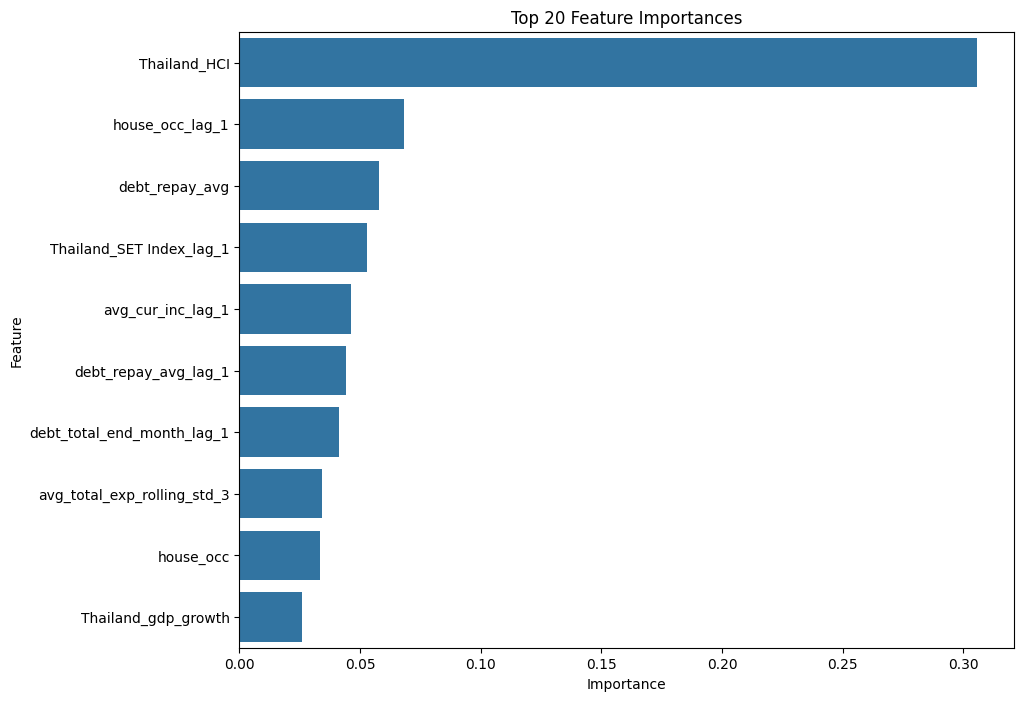

In [340]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

# Define the target variable and features
X = fp_reduce[data_reduced_cols]
y = fp_reduce['household_income_growth_rate']
head = 20
# Impute missing values
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Train a Random Forest model
rf = RandomForestRegressor()
rf.fit(X, y)

# Get feature importances
importances = rf.feature_importances_
feature_importances = pd.DataFrame({'feature': X.columns, 'importance': importances})

# Select top important features for simplicity
top_features = feature_importances.sort_values(by='importance', ascending=False).head(head)['feature']

# Reduce the dataset to the top features
data_final = fp_reduce[top_features]

# Merge on the Date index column
data_final = pd.merge(data_final, y, left_index=True, right_index=True, how='left')

# Display the final reduced dataframe
print(data_final.head())

# Visualize the feature importances
plt.figure(figsize=(10, 8))
sns.barplot(x='importance', y='feature', data=feature_importances.sort_values(by='importance', ascending=False).head(10))
plt.title(f'Top {head} Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [341]:
feature_importances.sort_values(by='importance', ascending=False)

,feature,importance
9,Thailand_HCI,0.305878
19,house_occ_lag_1,0.068101
4,debt_repay_avg,0.057927
23,Thailand_SET Index_lag_1,0.052804
17,avg_cur_inc_lag_1,0.046333
18,debt_repay_avg_lag_1,0.044041
20,debt_total_end_month_lag_1,0.041166
28,avg_total_exp_rolling_std_3,0.034345
6,house_occ,0.033311
11,Thailand_gdp_growth,0.026063


In [342]:
data_final = data_final.reset_index()

# Modelling (Reduce Features : Remain 5)

In [343]:
from prophet import Prophet
import pandas as pd
import numpy as np
from sklearn.model_selection import ParameterGrid

# Define the target column
target_column = 'household_income_growth_rate'

# Prepare the data for Prophet
prophet_data = data_final[['year', target_column]].rename(columns={'year': 'ds', target_column: 'y'})

# Define the forecast period for future predictions
start_year = 2013
end_year = 2033
increment_years = 2

# Create future dates manually
future_years = pd.date_range(start=f'{start_year}', end=f'{end_year}', freq=pd.DateOffset(years=increment_years)).year
future_dates = pd.DataFrame({'ds': pd.to_datetime([f'{year}-01-01' for year in future_years])})

# Hyperparameter tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.1, 0.5, 1.0],
    'seasonality_prior_scale': [0.1, 1.0, 10.0]
}

best_rmse = float('inf')
best_params = None
best_model = None

for params in ParameterGrid(param_grid):
    model = Prophet(changepoint_prior_scale=params['changepoint_prior_scale'],
                    seasonality_prior_scale=params['seasonality_prior_scale'])
    model.fit(prophet_data)
    
    # Create a future dataframe with existing and new dates
    future = pd.concat([prophet_data[['ds']], future_dates]).drop_duplicates().reset_index(drop=True)
    prophet_forecast = model.predict(future)
    
    # Filter forecast for the actual dataset period
    prophet_forecast_actual = prophet_forecast.set_index('ds').loc[prophet_data['ds']]['yhat']
    
    # Convert forecast and actual data to numpy arrays for RMSE calculation
    prophet_forecast_actual = np.array(prophet_forecast_actual)
    actual_y = np.array(prophet_data['y'])
    
    # Calculate RMSE
    prophet_rmse = np.sqrt(np.mean((actual_y - prophet_forecast_actual)**2))
    
    # Update best parameters if current RMSE is better
    if prophet_rmse < best_rmse:
        best_rmse = prophet_rmse
        best_params = params
        best_model = model

print(f'Best Parameters: {best_params}')
print(f'Best RMSE: {best_rmse}')

# Display future predictions with the best model
future = pd.concat([prophet_data[['ds']], future_dates]).drop_duplicates().reset_index(drop=True)
best_forecast = best_model.predict(future)
future_predictions = best_forecast[best_forecast['ds'].isin(future_dates['ds'])]

print('\nFuture Predictions:')
print(future_predictions[['ds', 'yhat']].rename(columns={'ds': 'Year', 'yhat': 'Predicted'}))


14:42:35 - cmdstanpy - INFO - Chain [1] start processing
14:42:35 - cmdstanpy - INFO - Chain [1] done processing
14:42:35 - cmdstanpy - INFO - Chain [1] start processing
14:42:35 - cmdstanpy - INFO - Chain [1] done processing
14:42:35 - cmdstanpy - INFO - Chain [1] start processing
14:42:35 - cmdstanpy - INFO - Chain [1] done processing
14:42:35 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1] done processing
14:42:36 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1] done processing
14:42:36 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1] done processing
14:42:36 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1] done processing
14:42:36 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1] done processing
14:42:36 - cmdstanpy - INFO - Chain [1] start processing
14:42:36 - cmdstanpy - INFO - Chain [1]

Best Parameters: {'changepoint_prior_scale': 1.0, 'seasonality_prior_scale': 10.0}
Best RMSE: 0.9361974594181119

Future Predictions:
         Year  Predicted
0  2013-01-01   0.072400
1  2015-01-01   0.064361
2  2017-01-01  -0.081039
3  2019-01-01  -0.089076
4  2021-01-01  -0.234471
5  2023-01-01  -0.242506
6  2025-01-01  -0.387901
7  2027-01-01  -0.395935
8  2029-01-01  -0.541331
9  2031-01-01  -0.549365
10 2033-01-01  -0.694760


In [354]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 22 columns):
 #   Column                                      Non-Null Count  Dtype         
---  ------                                      --------------  -----         
 0   year                                        11 non-null     datetime64[ns]
 1   Thailand_HCI                                11 non-null     float64       
 2   house_occ_lag_1                             11 non-null     float64       
 3   debt_repay_avg                              11 non-null     float64       
 4   Thailand_SET Index_lag_1                    11 non-null     float64       
 5   avg_cur_inc_lag_1                           11 non-null     float64       
 6   debt_repay_avg_lag_1                        11 non-null     float64       
 7   debt_total_end_month_lag_1                  11 non-null     float64       
 8   avg_total_exp_rolling_std_3                 11 non-null     float64       
 9   house_occ   

In [344]:
future_predictions[['yhat']]

,yhat
0,0.072400
1,0.064361
2,-0.081039
3,-0.089076
4,-0.234471
5,-0.242506
6,-0.387901
7,-0.395935
8,-0.541331
9,-0.549365


## Future Prediction

In [345]:
def inverse_transform(scaled_data, scaler, feature_name):
    """Inverse transform the scaled data using the scaler."""
    original_data = scaled_data.copy()
    column_index = fp.columns.get_loc(feature_name)
    original_data = scaled_data * scaler.scale_[column_index] + scaler.mean_[column_index]
    return original_data

In [346]:
arima_forecast_10yr = fp_reduce[['household_income_growth_rate']].to_numpy().reshape(-1,1).flatten()
prophet_forecast_10yr = future_predictions[['yhat']].to_numpy().reshape(-1,1).flatten()
linear_forecast_10yr = y_pred_full.to_numpy().reshape(-1,1).flatten()

In [347]:
arima_forecast_10yr = inverse_transform(arima_forecast_10yr, scaler_standard, 'household_income_growth_rate')
prophet_forecast_10yr = inverse_transform(prophet_forecast_10yr, scaler_standard, 'household_income_growth_rate')
linear_forecast_10yr = inverse_transform(linear_forecast_10yr, scaler_standard, 'household_income_growth_rate')

In [348]:
len(arima_forecast_10yr)
len(prophet_forecast_10yr)
len(linear_forecast_10yr)

11

In [349]:
# Forecast data for the years 2024-2033
forecast_years = np.arange(2013, 2034, 2)
forecast_df = pd.DataFrame({
    'Year': forecast_years,
    'ARIMA': arima_forecast_10yr,
    'Prophet': prophet_forecast_10yr,
    'Linear' : linear_forecast_10yr
})
forecast_df['Date'] = pd.to_datetime(forecast_df['Year'], format='%Y')
forecast_df.set_index('Date', inplace=True)
forecast_df.drop(columns='Year', inplace=True)

In [350]:
forecast_df

,ARIMA,Prophet,Linear
Date,,,
2013-01-01,0.073642,0.039813,0.073642
2015-01-01,0.073642,0.039489,0.073642
2017-01-01,-0.003833,0.033630,-0.003833
2019-01-01,-0.031380,0.033306,-0.031380
2021-01-01,0.047925,0.027447,0.047925
2023-01-01,0.061375,0.027124,0.024490
2025-01-01,-0.009611,0.021265,-0.006078
2027-01-01,-0.029159,0.020941,-0.025141
2029-01-01,0.036574,0.015083,-0.012212


In [351]:
forecast_df.to_excel('household_income_growth_pred_10yrs_2023.xlsx', index = True)

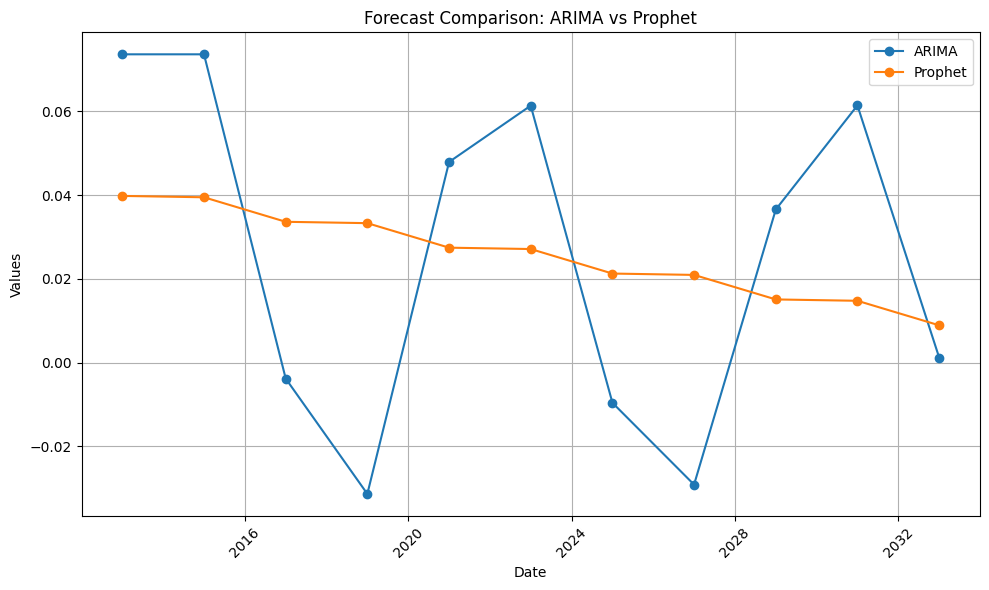

In [352]:
# Plot the data
plt.figure(figsize=(10, 6))
plt.plot(forecast_df.index, forecast_df["ARIMA"], marker='o', label="ARIMA")
plt.plot(forecast_df.index, forecast_df["Prophet"], marker='o', label="Prophet")

# Add titles and labels
plt.title("Forecast Comparison: ARIMA vs Prophet")
plt.xlabel("Date")
plt.ylabel("Values")
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()

# Show plot
plt.show()